# NFT Historical sales Feb 2021

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import plotly.express as px

In [118]:
df = pd.read_csv('nft_sales.csv')
df['event_time'] = pd.to_datetime(df['event_time'])
df['event_quantity'] = df['event_quantity'].apply(lambda x: float(x))

df = df[df['event_quantity'] < 100000] #outliers

C:\Users\Francesco\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning:

Columns (14) have mixed types.Specify dtype option on import or set low_memory=False.



In [119]:
df.shape

(108081, 17)

In [120]:
df.head()

,Unnamed: 0,collection_slug,collection_name,collection_url,asset_id,asset_name,asset_description,asset_contract_date,asset_url,asset_img_url,event_id,event_time,event_auction_type,event_contract_address,event_quantity,event_payment_symbol,event_total_price
0,0,rarible,Rarible,https://opensea.io/collection/rarible,18214580,Daft Punk Never Die,"Piece of art, Daft Punk, always in our hears.\...",2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/DRaz3AD6SNrC...,80762268,2021-02-27 23:59:19.806617,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1.0,ETH,0.070000
1,1,rarebit-bunnies,Rarebit Bunnies,https://opensea.io/collection/rarebit-bunnies,18276844,Rarebit #164 - Wax Off Bunny,🐇♥️ When it comes to high kicks this Rarebit's...,2021-01-21T20:43:08.113711,https://opensea.io/assets/0x61bd6b10c7bf3e548f...,https://lh3.googleusercontent.com/zI7j5Gc8jcJ_...,80762142,2021-02-27 23:58:48.806004,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1.0,ETH,0.150000
2,2,rarible,Rarible,https://opensea.io/collection/rarible,16911700,Meditation,Meditation by Diana.\n\nMinted only 20 NFT col...,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/VxNjqW9b0yKv...,80762131,2021-02-27 23:58:46.805355,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1.0,ETH,0.001000
3,3,rarible,Rarible,https://opensea.io/collection/rarible,16986936,I´m OG,This is one of the first NFTs in human history,2020-05-27T16:53:32.834583,https://opensea.io/assets/0xd07dc4262bcdbf8519...,https://lh3.googleusercontent.com/lwLuEUsHn2bd...,80762121,2021-02-27 23:58:45.675259,dutch,0xcd4ec7b66fbc029c116ba9ffb3e59351c20b5b06,1.0,ETH,0.000647
4,4,chainguardians,ChainGuardians,https://opensea.io/collection/chainguardians,13382164,Celia B100 #105,One of the original androids created within th...,2019-11-17T21:00:18.404059,https://opensea.io/assets/0x4fe99deb8f0be517c3...,https://lh3.googleusercontent.com/ODEhFsO_E_O8...,80762099,2021-02-27 23:58:43.700969,NaN,0x7be8076f4ea4a4ad08075c2508e481d6c946d12b,1.0,ETH,0.200000


In [142]:
daily_volume = df.set_index('event_time').groupby('collection_name') \
                .event_quantity.resample('1D').sum().reset_index()
daily_volume = daily_volume.set_index('event_time')

In [144]:
daily_volume.head()

,collection_name,event_quantity
event_time,,
2021-02-22,#HashTrends,1.0
2021-02-09,$2019STUFF$,1.0
2021-02-10,$2019STUFF$,0.0
2021-02-11,$2019STUFF$,1.0
2021-02-12,$2019STUFF$,0.0


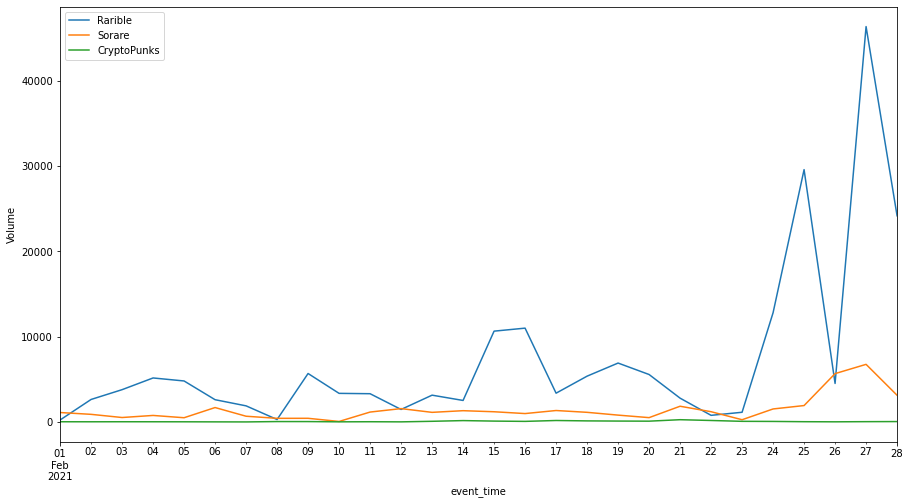

In [148]:
plt.figure(figsize=(15,8))
daily_volume[daily_volume['collection_name'] == 'Rarible']['event_quantity'].plot(label='Rarible')
daily_volume[daily_volume['collection_name'] == 'Sorare']['event_quantity'].plot(label='Sorare')
daily_volume[daily_volume['collection_name'] == 'CryptoPunks']['event_quantity'].plot(label='CryptoPunks')
plt.ylabel('Volume')
plt.legend()
plt.show()

In [150]:
daily_volume_eth = df[df['event_payment_symbol']== 'ETH'].set_index('event_time') \
                        .groupby('collection_name').event_total_price.resample('1D').sum().reset_index()
daily_volume_eth = daily_volume_eth.set_index('event_time')

In [151]:
daily_volume_eth.head()

,collection_name,event_total_price
event_time,,
2021-02-09,$2019STUFF$,0.0
2021-02-10,$2019STUFF$,0.0
2021-02-11,$2019STUFF$,0.0
2021-02-12,$2019STUFF$,0.0
2021-02-13,$2019STUFF$,0.0


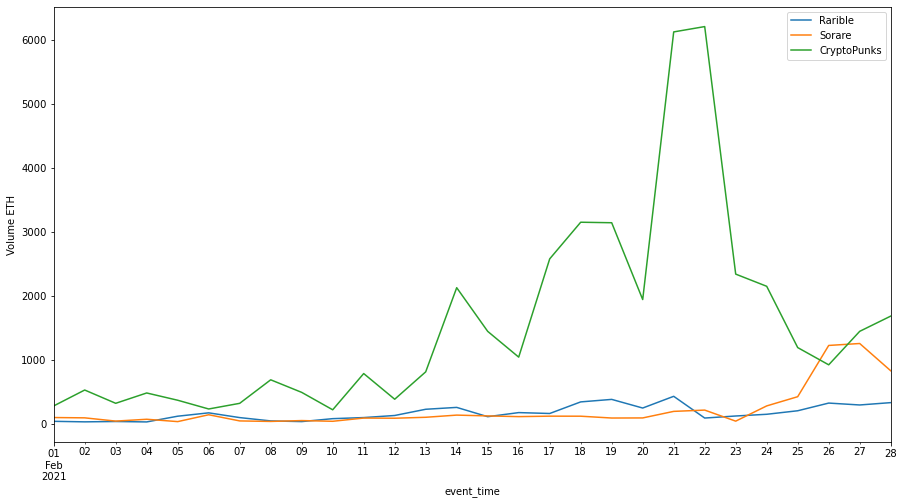

In [152]:
plt.figure(figsize=(15,8))
daily_volume_eth[daily_volume_eth['collection_name'] == 'Rarible']['event_total_price'].plot(label='Rarible')
daily_volume_eth[daily_volume_eth['collection_name'] == 'Sorare']['event_total_price'].plot(label='Sorare')
daily_volume_eth[daily_volume_eth['collection_name'] == 'CryptoPunks']['event_total_price'].plot(label='CryptoPunks')
plt.ylabel('Volume ETH')
plt.legend()
plt.show()